# This project is done by AbdelOuadoud Rasmi
### The goal of this program is to run some supervised learning
### algorithms on a real case DATASET of heart disease infection
### to predict if the new individual will be affected or not



In [102]:
#importing Needed libraries 
import pandas as pandas

import numpy as np

#used to visualise data
import seaborn as sns

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [103]:
# improting unstructured data set as csv
dataSet = pandas.read_csv("heart.csv")
print(dataSet)

     Age   Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40  .M,.           ATA        140          289          0   NorM@al;   
1     49     F           NAP        160          180          0     Normal   
2     37  .M,.           ATA        130          283          0        ST.   
3     48     F           ASY        138          214          0     Normal   
4     54     M           NAP        150          195          0     Normal   
..   ...   ...           ...        ...          ...        ...        ...   
870   71     F           ATA        160          302          0     Normal   
871   61     M           NAP        150          243          1     Normal   
872   55     M           ASY        132          353          0     Normal   
873   64     M           NAP        140          335          0     Normal   
874   43     M           ASY        150          247          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0  

# in the next part i will import it and treat it before appliying supervised learning algorithms on it



### After making some researches it seems that FastingBS has no influence on HeartDiseases infection or not

In [104]:
#deleting FastingBS and ChestPainType column since it has no influence on classification
dataSet = pandas.read_csv("heart.csv")
dataSet.drop(['FastingBS','ChestPainType'], axis=1)

,Age,Sex,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,".M,.",140,289,NorM@al;,172,N,0.0,Up,0
1,49,F,160,180,Normal,156,N,1.0,Flat,1
2,37,".M,.",130,283,ST.,98,N,0.0,UP,0
3,48,F,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,150,195,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...
870,71,F,160,302,Normal,162,N,0.4,Up,0
871,61,M,150,243,Normal,137,Y,1.0,Flat,0
872,55,M,132,353,Normal,132,Y,1.2,Flat,1
873,64,M,140,335,Normal,158,N,0.0,Up,1


# Checking if there's any missing value in our dataset

In [105]:
#printing Nan values for each attribute 
dataSet.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Now the next step will be comparing the two classes we have to know how much is this dataset fair to use

C:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    485
0    390
Name: HeartDisease, dtype: int64


<AxesSubplot:ylabel='HeartDisease'>

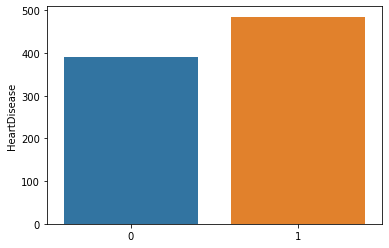

In [106]:

column=dataSet['HeartDisease'].value_counts()
print(column)

sns.barplot(column.index,column)

## Now we need to Normalise our dataset to give it to Learning Algorithms


#### 1-First we normalize Age attribute

In [107]:
#normalizing Age attribute
age_column = dataSet["Age"]
max_age = age_column.max()
min_age = age_column.min()
age_diff = max_age - min_age

k = 0
for cell in age_column:
    new_value = (cell - min_age)/age_diff   
    age_column.loc[k] = new_value
    k = k+1



C:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### 2-Second we normalize RestingBP attribute

In [108]:
#normalizing RestingBp
rbp_column = dataSet["RestingBP"]
max_rbp = rbp_column.max()
min_rbp = rbp_column.min()
rbp_diff = max_rbp - min_rbp

k = 0
for cell in rbp_column:
    new_value = (cell - min_rbp)/rbp_diff   
    rbp_column.loc[k] = new_value
    k = k+1


#### 3- Third we normalize the Cholesterol attribute

In [109]:
#normalizing Cholesterol
chol_column = dataSet["Cholesterol"]
max_chol = chol_column.max()
min_chol = chol_column.min()
chol_diff = max_chol - min_chol

k = 0
for cell in chol_column:
    new_value = (cell - min_chol)/chol_diff   
    chol_column.loc[k] = new_value
    k = k+1

### 4-Fourth MaxHr

In [110]:
#normalizing Cholesterol
hr_column = dataSet["MaxHR"]
max_hr = hr_column.max()
min_hr = hr_column.min()
hr_diff = max_hr - min_hr

k = 0
for cell in hr_column:
    new_value = (cell - min_hr)/hr_diff   
    hr_column.loc[k] = new_value
    k = k+1

#### 4-We print the data set now

In [111]:
print(dataSet)

          Age   Sex ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    0.244898  .M,.           ATA       0.70     0.479270          0   
1    0.428571     F           NAP       0.80     0.298507          0   
2    0.183673  .M,.           ATA       0.65     0.469320          0   
3    0.408163     F           ASY       0.69     0.354892          0   
4    0.530612     M           NAP       0.75     0.323383          0   
..        ...   ...           ...        ...          ...        ...   
870  0.877551     F           ATA       0.80     0.500829          0   
871  0.673469     M           NAP       0.75     0.402985          1   
872  0.551020     M           ASY       0.66     0.585406          0   
873  0.734694     M           NAP       0.70     0.555556          0   
874  0.306122     M           ASY       0.75     0.409619          0   

    RestingECG     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0     NorM@al;  0.788732              N      0.0       Up    

## Now We recognize some malformed Textual Data for example "NORMAL" is the same as "NorM@al;" and "up" is the same as "UP,"


### then we need to fix all textual attributes

In [112]:
#replacing bad characters like @ ; , . ext...
restingecg_column = dataSet["RestingECG"]
chestpain_column=dataSet["ChestPainType"]
sex_column = dataSet["Sex"]
stslope_column = dataSet["ST_Slope"]
exercieangina_column = dataSet["ExerciseAngina"]

### this method cleans teh text from unwated characters and transforms it to lower case
def cleanText(cell):
    string = str(cell).lower()
    #
    string = string.replace(".","")
    #
    string = string.replace(",","") 
    #
    string = string.replace("@","")    
    #
    string = string.replace(";","")      
    #
    string = string.replace("-","")      
    return string

### this method edit a column
def cleanColumn(column):
      k = 0
      for cell in column:
            column.loc[k] = cleanText(cell)
            k = k + 1
      return np.void

k = 0

#restingECG column cleaning
cleanColumn(restingecg_column)
#chestPain column cleaning
cleanColumn(chestpain_column)
#SEX column cleaning
cleanColumn(sex_column)
#ST_Slope column cleaning
cleanColumn(stslope_column)
#ExerciseAngina column cleaning
cleanColumn(exercieangina_column)
  

C:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


numpy.void

## And we print the dataset again

In [113]:
print(dataSet)

          Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    0.244898   m           ata       0.70     0.479270          0     normal   
1    0.428571   f           nap       0.80     0.298507          0     normal   
2    0.183673   m           ata       0.65     0.469320          0         st   
3    0.408163   f           asy       0.69     0.354892          0     normal   
4    0.530612   m           nap       0.75     0.323383          0     normal   
..        ...  ..           ...        ...          ...        ...        ...   
870  0.877551   f           ata       0.80     0.500829          0     normal   
871  0.673469   m           nap       0.75     0.402985          1     normal   
872  0.551020   m           asy       0.66     0.585406          0     normal   
873  0.734694   m           nap       0.70     0.555556          0     normal   
874  0.306122   m           asy       0.75     0.409619          0     normal   

        MaxHR ExerciseAngin

# Now we will apply learning algorithms on our dataset

##1-KNN with k = 3 and k = 5 and k = 11

In [114]:

#converting strings to numbers

##sex
k = 0
for cell in sex_column:
    string = str(cell).replace("m",'1').replace("f",'0')
    sex_column.loc[k] = string
    k = k+1

##ExcerciceAngina
k=0
for cell in exercieangina_column:
    string = str(cell).replace("y",'1').replace("n",'0')
    exercieangina_column.loc[k] = string
    k = k+1

##RestingEcg
k = 0
for cell in restingecg_column:
    string = str(cell).replace("normal",'1').replace("st",'0').replace("lvh","0.5")
    restingecg_column.loc[k] = string
    k = k+1    

##ChestPainType
k = 0
for cell in chestpain_column:
    string = str(cell).replace("ata",'1').replace("nap",'0').replace("asy","0.5")
    chestpain_column.loc[k] = string
    k = k+1    

##ST_SLOPE
k = 0
for cell in stslope_column:
    string = str(cell).replace("up",'1').replace("flat",'0').replace("down","0.5")
    stslope_column.loc[k] = string
    k = k+1    


#splitting the data set into training and test
x = dataSet.drop(['HeartDisease','ChestPainType'],axis=1)
y = dataSet['HeartDisease']

X_train,X_test,  y_train, y_test,= train_test_split(x,y,test_size=0.25,random_state = 10)
print(X_test)
# preparing the algorithm
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn11 = KNeighborsClassifier(n_neighbors = 11)
#
#print(x_train)
#print(y_train)

knn3.fit(X_train,y_train)
knn5.fit(X_train,y_train)
knn11.fit(X_train,y_train)

#
x3=knn3.predict(X_test)
x5=knn5.predict(X_test)
x11=knn11.predict(X_test)
#
x3Pro=knn3.predict_proba(X_test)
x5Pro=knn5.predict_proba(X_test)
x11Pro=knn11.predict_proba(X_test)

print(x)


C:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


          Age Sex  RestingBP  Cholesterol  FastingBS RestingECG     MaxHR  \
179  0.367347   0      0.650     0.394693          0          1  0.211268   
511  0.714286   1      0.800     0.442786          1          0  0.197183   
43   0.489796   1      0.700     0.429519          0          0  0.774648   
410  0.693878   1      0.750     0.000000          1          0  0.126761   
431  0.693878   1      0.600     0.364842          0          0  0.183099   
..        ...  ..        ...          ...        ...        ...       ...   
217  0.530612   1      0.600     0.359867          0          1  0.542254   
35   0.081633   1      0.625     0.421227          0          1  0.669014   
857  0.510204   0      0.650     0.437811          0        0.5  0.584507   
524  0.551020   1      0.750     0.265340          0          0  0.633803   
374  0.673469   1      0.625     0.000000          0          1  0.316901   

    ExerciseAngina  Oldpeak ST_Slope  
179              0      0.0        1

In [119]:

#evualtion part
from sklearn import metrics
#prediction on test data
x3_score = metrics.r2_score(y_test,x3)
x5_score = metrics.r2_score(y_test,x5)
x11_score = metrics.r2_score(y_test,x11)

print(x3_score)
print(x5_score)
print(x11_score)

0.37206948895260594
0.5013493000505989
0.40900657783774674


# Now we predict a new data

In [129]:
#a new normalized input
input = (0.66,1,0.650,0.49,1,0.5,0.801,0,1.2,1)
input_array = np.asarray(input)
reshaped = input_array.reshape(1,-1)
prediction = knn5.predict(reshaped)

result = ''

if prediction == 1 : result ='HeartDiseased'
else:
 result ='undiseased yay '

print("The new element prediction is: ", result)

The new element prediction is:  HeartDiseased


C:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
